In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd /content/gdrive/MyDrive/DeepST_run/DeepST/deepst

/content/gdrive/MyDrive/DeepST_run/DeepST/deepst


In [4]:
!ls

adj.py	    _compat.py	his_feat.py  __pycache__  run_deepst.ipynb  utils_func.py
augment.py  DeepST.py	model.py     README	  trainer.py


In [5]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 13.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=2ece2a345318c9621ef5b3273d85634ad39194e7a5bf6a501ef9c9c87adbe0a2
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=d34243ec9939a9e8d938a0dc4abafb3842183c5a701059dfd56100dce85323e4
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9

In [6]:
!pip install torch_sparse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch_sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=2659116 sha256=e44188b64989fee120eecc4d2e5318a92d5a691c905c9bc4adbc07365a22b687
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built torch_sparse


In [7]:
!pip install torch_scatter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch_scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=3571346 sha256=15af2acc337297fedc7b8616217f59e89eaf6abc78148025dbc7ca0cf9b95725
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch_scatter


In [8]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.8 MB/s eta 0:00:00


In [9]:
!pip install scikit-network


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 13.2 MB/s eta 0:00:00


In [10]:
import os
from DeepST import run
import matplotlib.pyplot as plt
from pathlib import Path
import scanpy as sc

In [11]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.3 MB/s eta 0:00:00


In [12]:
!pip install louvain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.6 MB/s eta 0:00:00


In [13]:
data_path = "/content/gdrive/MyDrive/DeepST_run/DeepST/data/DLPFC" #### to your path
data_name = '151510' #### project name
save_path = "/content/gdrive/MyDrive/DeepST_run/DeepST/Results/Figure/151510" #### save path
n_domains = 7 ###### the number of spatial domains

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=R

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 32.79542511868796
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


Your task is in full swing, please wait


DeepST trains an initial model: 100%|██████████ [ time left: 00:00 ]
DeepST trains a final model:   0%|           [ time left: ? ]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:2943: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(
DeepST trains a final model: |           [ time left: 00:00 ]


Step 3: DeepST training has been Done!
Current memory usage：5.9557 GB
Total time: 1.33 minutes
Your task has been completed, thank you
Of course, you can also perform downstream analysis on the processed data
Best resolution:  0.6099999999999998


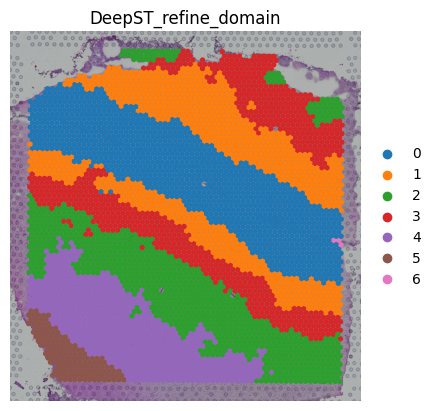

<Figure size 640x480 with 0 Axes>

In [14]:
deepen = run(save_path = save_path,
	task = "Identify_Domain", #### DeepST includes two tasks, one is "Identify_Domain" and the other is "Integration"
	pre_epochs = 800, ####  choose the number of training
	epochs = 1000, #### choose the number of training
	use_gpu = True)
adata = deepen._get_adata(platform="Visium", data_path=data_path, data_name=data_name)
###### Segment the Morphological Image
adata = deepen._get_image_crop(adata, data_name=data_name)

###### Data augmentation. spatial_type includes three kinds of "KDTree", "BallTree" and "LinearRegress", among which "LinearRegress"
###### is only applicable to 10x visium and the remaining omics selects the other two.
###### "use_morphological" defines whether to use morphological images.
adata = deepen._get_augment(adata, spatial_type="LinearRegress", use_morphological=True)

###### Build graphs. "distType" includes "KDTree", "BallTree", "kneighbors_graph", "Radius", etc., see adj.py
graph_dict = deepen._get_graph(adata.obsm["spatial"], distType = "BallTree")

###### Enhanced data preprocessing
data = deepen._data_process(adata, pca_n_comps = 200)

###### Training models
deepst_embed = deepen._fit(
		data = data,
		graph_dict = graph_dict,)
###### DeepST outputs
adata.obsm["DeepST_embed"] = deepst_embed

###### Define the number of space domains, and the model can also be customized. If it is a model custom priori = False.
adata = deepen._get_cluster_data(adata, n_domains=n_domains, priori = True)

###### Spatial localization map of the spatial domain
sc.pl.spatial(adata, color='DeepST_refine_domain', frameon = False, spot_size=150)
plt.savefig(os.path.join(save_path, f'{data_name}_domains.pdf'), bbox_inches='tight', dpi=300)


In [15]:
adata

AnnData object with n_obs × n_vars = 4634 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'slices_path', 'leiden', 'DeepST_domain', 'DeepST_refine_domain'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'neighbors', 'leiden', 'DeepST_refine_domain_colors'
    obsm: 'spatial', 'image_feat', 'image_feat_pca', 'weights_matrix_all', 'adjacent_data', 'augment_gene_data', 'DeepST_embed'
    obsp: 'distances', 'connectivities'

In [16]:
import pandas as pd

from sklearn import metrics
df_meta = pd.read_csv('/content/gdrive/MyDrive/DeepST_run/DeepST/data/DLPFC/151510/metadata.tsv', sep='\t')
df_meta_layer = df_meta['layer_guess']
adata.obs['Ground_Truth'] = df_meta_layer.values
adata = adata[~pd.isnull(adata.obs['Ground_Truth'])]

In [17]:
adata

View of AnnData object with n_obs × n_vars = 4595 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'slices_path', 'leiden', 'DeepST_domain', 'DeepST_refine_domain', 'Ground_Truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'neighbors', 'leiden', 'DeepST_refine_domain_colors'
    obsm: 'spatial', 'image_feat', 'image_feat_pca', 'weights_matrix_all', 'adjacent_data', 'augment_gene_data', 'DeepST_embed'
    obsp: 'distances', 'connectivities'

In [18]:
ARI = metrics.adjusted_rand_score(adata.obs['DeepST_refine_domain'], adata.obs['Ground_Truth'])
adata.uns['ARI'] = ARI
print('ARI:', ARI)

<ipython-input-18-bceacc4eaa21>:2: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ARI'] = ARI


ARI: 0.5077957148735419


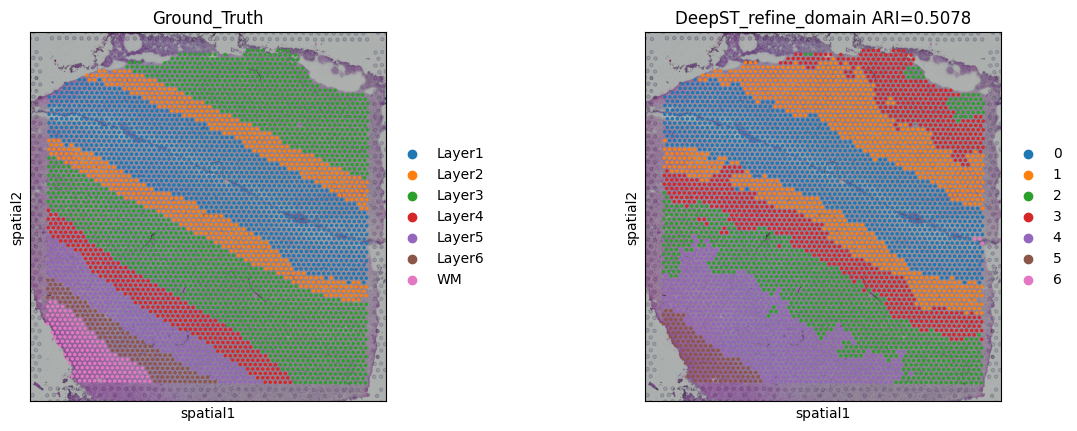

In [19]:
sc.pl.spatial(adata,
              img_key="hires",
              color=["Ground_Truth", "DeepST_refine_domain"],
              title=["Ground_Truth", "DeepST_refine_domain ARI=%.4f"%ARI],
              show=True)